Exploring model productivity and trophic transfer efficiency for the lower trophic levels in the Salish Sea Atlantis Model 

In [1]:
import os
import xarray as xr
import numpy as np
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

## Productivity and Trophic Transfer Efficiency
spatial and temporal plots of productivity & trophic transfer efficiency for comparison with SalishSeaCast

In [ ]:
filname = "v6699_50y_20241105_fisheriesOFF"

In [2]:
# Reading in Atlantis map

shapefile_name = "/ocean/rlovindeer/Atlantis/ssam_oceanparcels/SalishSea/SalishSea_July172019_2/SalishSea_July172019.shp"
data_df = gpd.read_file(shapefile_name)
data_df = data_df.sort_values(by=['BOX_ID'])
box_depth = data_df['BOTZ']
land_boxes = box_depth==0
land_boxes = data_df.index[land_boxes]

In [3]:
# Reading Productivity files & variables
PROD_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Control/" + filename + "/outputSalishSeaPROD.nc"
PROD = xr.open_dataset(str(PROD_file), decode_cf=True)
PROD_time = np.ma.filled(PROD.variables['t'], np.nan)

Using output from Atlantis boxes 82 - 86  for comparison with SalishSeaCast productivity for the Strait of Georgia, 

In [4]:
t2008 = np.where(PROD_time=='2016-01-01T14:00:00.000000000')
tstop = 255 #np.where(PROD_time=='2017-01-01T14:00:00.000000000')[0][0]

/tmp/ipykernel_2618478/3787966597.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  t2008 = np.where(PROD_time=='2016-01-01T14:00:00.000000000')


In [5]:
PROD_time.shape

(204,)

In [6]:
microzoo_prod = np.ma.filled(PROD.variables['MicroZooProdn'], np.nan) #ZS mg N m-3 d-1
zoo_prod = np.ma.filled(PROD.variables['ZooProdn'], np.nan) #ZS mg N m-3 d-1
carn_zoo_prod = np.ma.filled(PROD.variables['Carniv_ZooProdn'], np.nan) #ZL mg N m-3 d-1
gel_zoo_prod = np.ma.filled(PROD.variables['Gelat_ZooProdn'], np.nan) #ZG mg N m-3 d-1

diatom_prod = np.ma.filled(PROD.variables['DiatomProdn'], np.nan) #PL mg N m-3 d-1
pico_prod = np.ma.filled(PROD.variables['PicoPhytoplProdn'], np.nan) #PS mg N m-3 d-1

mesozooplankton_prod = (carn_zoo_prod[:, 82:86] + gel_zoo_prod[:, 82:86]) # *5.7 to convert to mgC m-3 d-1
microzooplankton_prod = microzoo_prod[:, 82:86]
zooplankton_prod = zoo_prod[:, 82:86]

phytoplankton_prod = (diatom_prod[:, 82:86] + pico_prod[:, 82:86])

In [7]:
phytoplankton_prod.shape

(204, 4)

In [8]:
np.max(phytoplankton_prod)/14.0067 #convert to mmol N

5.069779175128833

Trophic Transfer Efficiency (TTE) = secondary productivity [zooplankton] / primary productivity [phytoplankton]

In [9]:
# all zooplankton productivity
tte_per_box = (zooplankton_prod / phytoplankton_prod)*100
tte_sog = tte_per_box.sum(axis=1)

/tmp/ipykernel_2618478/231701801.py:2: RuntimeWarning: invalid value encountered in true_divide
  tte_per_box = (zooplankton_prod / phytoplankton_prod)*100


In [10]:
tte_sog.shape

(204,)

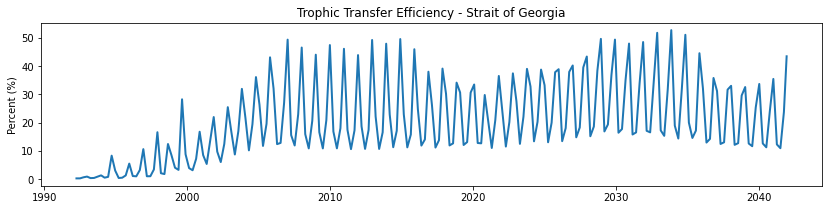

In [11]:
fig, ax = plt.subplots(figsize = (14,3))
ax.plot(PROD_time, tte_sog, linewidth = 2) #control_time, param_control, 
ax.set_title('Trophic Transfer Efficiency - Strait of Georgia', fontsize = 12)
ax.set_ylabel('Percent (%)');
#ax.set_ylabel('mgN m$^{-3}$ d$^{-1}$)');

In [12]:
# microzoo versus mesozoo
tte_per_box_microzoo = (microzooplankton_prod / phytoplankton_prod)*100
tte_per_box_mesozoo = (mesozooplankton_prod / phytoplankton_prod)*100
tte_per_box_zoo = (zooplankton_prod / phytoplankton_prod)*100
tte_sog_microzoo = tte_per_box_microzoo.sum(axis=1)
tte_sog_mesozoo = tte_per_box_mesozoo.sum(axis=1)
tte_sog_zoo = tte_per_box_zoo.sum(axis=1)

/tmp/ipykernel_2618478/1592979979.py:2: RuntimeWarning: invalid value encountered in true_divide
  tte_per_box_microzoo = (microzooplankton_prod / phytoplankton_prod)*100
/tmp/ipykernel_2618478/1592979979.py:3: RuntimeWarning: invalid value encountered in true_divide
  tte_per_box_mesozoo = (mesozooplankton_prod / phytoplankton_prod)*100
/tmp/ipykernel_2618478/1592979979.py:4: RuntimeWarning: invalid value encountered in true_divide
  tte_per_box_zoo = (zooplankton_prod / phytoplankton_prod)*100


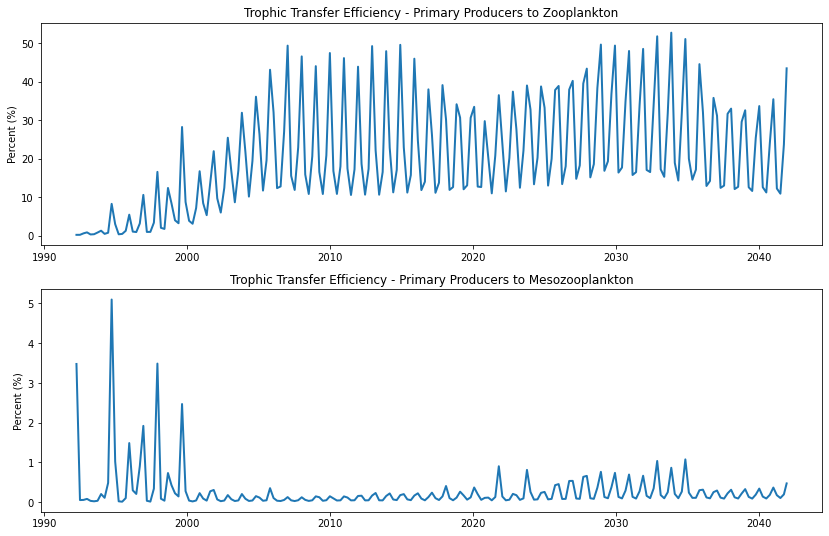

In [13]:
fig, ax = plt.subplots(2,1, figsize = (14,9))
ax[0].plot(PROD_time, tte_sog_zoo, linewidth = 2) #control_time, param_control, 
ax[0].set_title('Trophic Transfer Efficiency - Primary Producers to Zooplankton', fontsize = 12)
ax[0].set_ylabel('Percent (%)');
#ax.set_ylabel('mgN m$^{-3}$ d$^{-1}$)');

ax[1].plot(PROD_time, tte_sog_mesozoo, linewidth = 2) #control_time, param_control, 
ax[1].set_title('Trophic Transfer Efficiency - Primary Producers to Mesozooplankton', fontsize = 12)
ax[1].set_ylabel('Percent (%)');


## Exploring output related to Productivity and Trophic Transfer Efficiency
spatial and temporal plots of productivity & trophic transfer efficiency for comparison with SalishSeaCast

In [14]:
tstop = PROD_time.size - 80 #np.where(PROD_time=='2017-01-01T14:00:00.000000000')[0][0]
tstart = tstop - 12 #np.where(PROD_time=='2016-01-01T14:00:00.000000000')[0][0]

microzoo_prod_t = np.ma.filled(PROD.variables['MicroZooProdn'][tstart:tstop][:], np.nan) #ZS
mesozoo_prod_t = np.ma.filled(PROD.variables['ZooProdn'][tstart:tstop][:], np.nan) #ZS
carn_zoo_prod_t = np.ma.filled(PROD.variables['Carniv_ZooProdn'][tstart:tstop][:], np.nan) #ZL
gel_zoo_prod_t = np.ma.filled(PROD.variables['Gelat_ZooProdn'][tstart:tstop][:], np.nan) #ZG

diatom_prod_t = np.ma.filled(PROD.variables['DiatomProdn'], np.nan) #PL
pico_prod_t = np.ma.filled(PROD.variables['PicoPhytoplProdn'], np.nan) #PS

zoo_prod_t = (microzoo_prod_t + mesozoo_prod_t + carn_zoo_prod_t + gel_zoo_prod_t)*5.7 #converted mg N m-3 d-1 to mgC m-3 d-1 
phyto_prod_t = (diatom_prod_t + pico_prod_t)*5.7


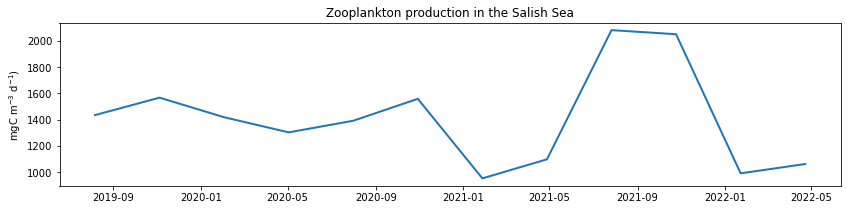

In [15]:
fig, ax = plt.subplots(figsize = (14,3))
ax.plot(PROD_time[tstart:tstop], zoo_prod_t.sum(axis=1), linewidth = 2) #control_time, param_control, 
ax.set_title('Zooplankton production in the Salish Sea', fontsize = 12)
ax.set_ylabel('mgC m$^{-3}$ d$^{-1}$)');

In [16]:
np.max(phyto_prod_t.sum(axis=1))

30413.44344156091

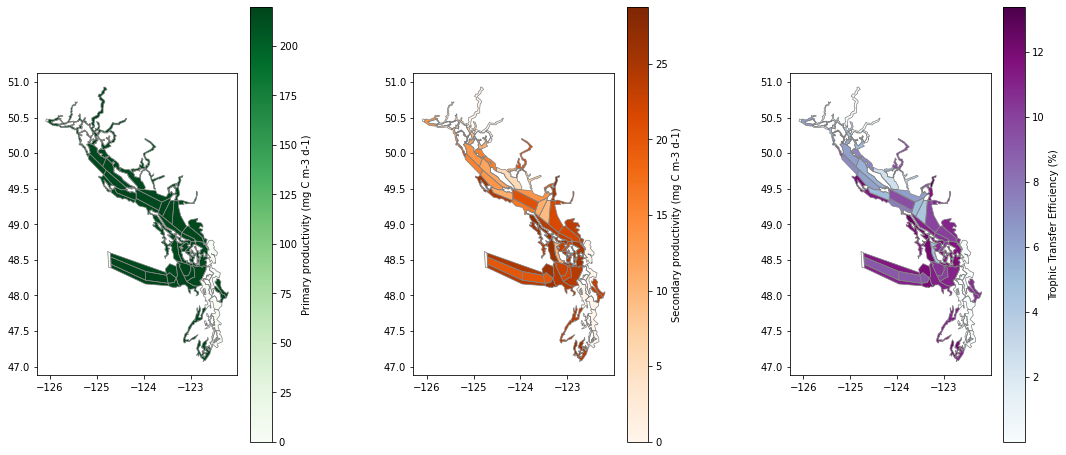

In [18]:
# Spatial Plots
data_df['zoo_prod'] = zoo_prod_t.mean(axis=0) #/14.0067 #convert to mmol N
data_df['phyto_prod'] = phyto_prod_t.mean(axis=0) #/14.0067 #convert to mmol N
data_df['tte'] = (data_df['zoo_prod'] / data_df['phyto_prod'])*100
#data_df.loc[land_boxes, 'zoo_prod'] = 0
#data_df.loc[land_boxes, 'zoo_prod'] = 0

land_df = data_df.loc[land_boxes]
v_min = 0
v_max = 100 #np.max(dVar)

fig = plt.figure(figsize=(18, 8), facecolor='white') #figsize=(9, 12)
gs = plt.GridSpec(1, 3, wspace=0.5, hspace=0.2, width_ratios=[1, 1, 1], height_ratios=[1],)

ax = fig.add_subplot(gs[0, 0])    
ax = data_df.plot(column = 'phyto_prod', cmap=cm.Greens, ax=ax, #vmin=0, vmax=20, 
    legend=True, legend_kwds={'label': 'Primary productivity (mg C m-3 d-1)'
    },)
data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
land_df.plot(ax=ax, color='white')

ax = fig.add_subplot(gs[0, 1])
ax = data_df.plot(column = 'zoo_prod', cmap=cm.Oranges, ax=ax,
    legend=True, legend_kwds={'label': 'Secondary productivity (mg C m-3 d-1)'
    },)
data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
land_df.plot(ax=ax, color='white') 

ax = fig.add_subplot(gs[0, 2])
ax = data_df.plot(column = 'tte', cmap=cm.BuPu, ax=ax,
    legend=True, legend_kwds={'label': 'Trophic Transfer Efficiency (%)'
    },)
data_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
land_df.plot(ax=ax, color='white');

#print(num_steps)



## Plankton Biomass
comparison of plankton biomass to SalishSeaCast biomass

In [20]:
#Atlantis Diatoms
data_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Control/" + filename + "/outputSalishSea.nc"

data = xr.open_dataset(str(data_file), decode_cf=True) #[t, box, z]

ssam_time = np.ma.filled(data.variables['t'], np.nan)

diatoms_SSAM_tbz = np.ma.filled(data.variables['Diatom_N'], np.nan)

diatoms_SSAM_tb = diatoms_SSAM_tbz.sum(axis=2)

In [21]:
diatoms_SSAM = diatoms_SSAM_tb.sum(axis=1)
#/2938324637738 convert from tonnes to tonnes m-3

In [ ]:
#SalishSeaCast Diatoms

dfile10 = "/ocean/dlatorne/Atlantis/day-avg-diatoms/SalishSeaCast_day_avg_diatoms_20070101_20070110.nc"
dfile30 = "/ocean/dlatorne/Atlantis/day-avg-diatoms/SalishSeaCast_day_avg_diatoms_20070101_20070131.nc"

data10 = xr.open_dataset(str(dfile10), decode_cf=True)
data30 = xr.open_dataset(str(dfile30), decode_cf=True)

diatoms_SSC_tzyx = data30.variables["diatoms"] # [t,z, y, x]

diatoms_SSC_tzy = diatoms_SSC_tzyx.sum(axis=3)
diatoms_SSC_tz = diatoms_SSC_tzy.sum(axis=2)

In [7]:
diatoms_SSC = diatoms_SSC_tz.sum(axis=1)*2938324637738 # converted to tonnes based on SSAM volume for comparison
#*1.54e-08 convert from mmol m-3 to tonnes m-3

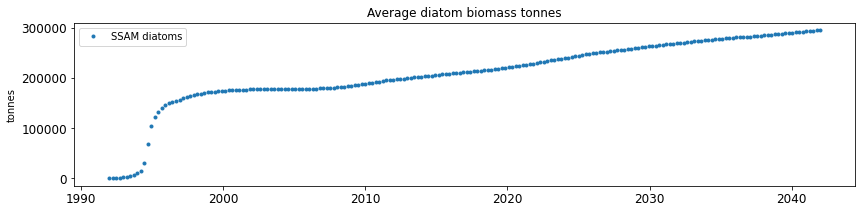

In [22]:
#Plots

fig, ax = plt.subplots(figsize = (14,3)) 
ax.plot(ssam_time, diatoms_SSAM,'.', linewidth = 2)
ax.set_title('Average diatom biomass tonnes', fontsize = 12)
ax.set_ylabel('tonnes')
ax.tick_params(labelsize=12)
ax.legend(('SSAM diatoms', 'SSC diatoms'), loc='best');

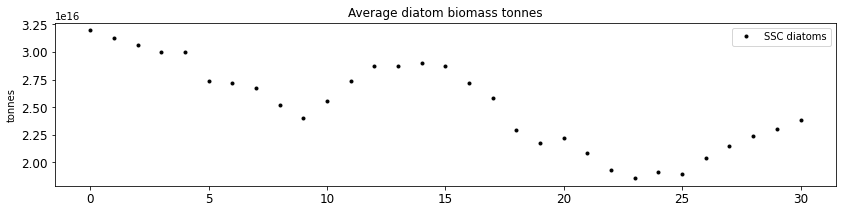

In [9]:
fig, ax = plt.subplots(figsize = (14,3)) 
ax.plot(diatoms_SSC, 'k.', linewidth = 2)
ax.set_title('Average diatom biomass tonnes', fontsize = 12)
ax.set_ylabel('tonnes')
ax.tick_params(labelsize=12)
ax.legend(('SSC diatoms', 'other'), loc='best');